In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
fb_df = pd.read_csv('data/dataset_Facebook.csv', sep=',', na_values='NaN',
                    dtype={'Category': 'object', 'Paid': 'object', 'Post Month': 'object',
                           'Post Weekday': 'object', 'Post Hour': 'object'})

In [12]:
cols= [str(col).title() for col in fb_df.columns]

In [13]:
# Shorten column names
fb_df.rename(columns={'Lifetime Post Total Reach': 'LT Post Total Reach',
                      'Lifetime Post Total Impressions': 'LT Post Total Imp',
                      'Lifetime Engaged Users': 'LT Engd Users',
                      'Lifetime Post Consumers': 'LT Post Consumers',
                      'Lifetime Post Consumptions': 'LT Post Consump',
                      'Lifetime Post Impressions by people who have liked your Page':
                      'LT Post Imp + Liked Page',
                      'Lifetime Post reach by people who like your Page':
                      'LT Post Reach + Liked Page',
                      'Lifetime People who have liked your Page and engaged with your post': 'LT People + Engd Post',
                      'comment': 'Comment',
                      'like': 'Like',
                      'share': 'Share',
                      'Total Interactions': 'Total Int'
                     }, inplace=True)

In [14]:
fb_df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LT Post Total Reach,LT Post Total Imp,LT Engd Users,LT Post Consumers,LT Post Consump,LT Post Imp + Liked Page,LT Post Reach + Liked Page,LT People + Engd Post,Comment,Like,Share,Total Int
0,139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [7]:
fb_df.tail()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LT Post Total Reach,LT Post Total Imp,LT Engd Users,LT Post Consumers,LT Post Consump,LT Post Imp + Liked Page,LT Post Reach + Liked Page,LT People + Engd Post,Comment,Like,Share,Total Int
495,85093,Photo,3,1,7,2,0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136
499,81370,Photo,2,1,4,4,NaN,4188,7292,564,524,743,3861,2200,316,0,91.0,28.0,119


In [15]:
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Page total likes            500 non-null    int64  
 1   Type                        500 non-null    object 
 2   Category                    500 non-null    object 
 3   Post Month                  500 non-null    object 
 4   Post Weekday                500 non-null    object 
 5   Post Hour                   500 non-null    object 
 6   Paid                        499 non-null    object 
 7   LT Post Total Reach         500 non-null    int64  
 8   LT Post Total Imp           500 non-null    int64  
 9   LT Engd Users               500 non-null    int64  
 10  LT Post Consumers           500 non-null    int64  
 11  LT Post Consump             500 non-null    int64  
 12  LT Post Imp + Liked Page    500 non-null    int64  
 13  LT Post Reach + Liked Page  500 non

In [25]:
fb_obj_df = fb_df.select_dtypes('object')
fb_obj_df.nunique()

Type             4
Category         3
Post Month      12
Post Weekday     7
Post Hour       22
Paid             2
dtype: int64

In [23]:
fb_obj_df.nunique().sum() - len(fb_obj_df.nunique())

44

In [22]:
fb_df.describe().applymap('{:.2f}'.format)

,Page total likes,LT Post Total Reach,LT Post Total Imp,LT Engd Users,LT Post Consumers,LT Post Consump,LT Post Imp + Liked Page,LT Post Reach + Liked Page,LT People + Engd Post,Comment,Like,Share,Total Int
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,499.00,496.00,500.00
mean,123194.18,13903.36,29585.95,920.34,798.77,1415.13,16766.38,6585.49,609.99,7.48,177.95,27.27,212.12
std,16272.81,22740.79,76803.25,985.02,882.51,2000.59,59791.02,7682.01,612.73,21.18,323.40,42.61,380.23
min,81370.00,238.00,570.00,9.00,9.00,9.00,567.00,236.00,9.00,0.00,0.00,0.00,0.00
25%,112676.00,3315.00,5694.75,393.75,332.50,509.25,3969.75,2181.50,291.00,1.00,56.50,10.00,71.00
50%,129600.00,5281.00,9051.00,625.50,551.50,851.00,6255.50,3417.00,412.00,3.00,101.00,19.00,123.50
75%,136393.00,13168.00,22085.50,1062.00,955.50,1463.00,14860.50,7989.00,656.25,7.00,187.50,32.25,228.50
max,139441.00,180480.00,1110282.00,11452.00,11328.00,19779.00,1107833.00,51456.00,4376.00,372.00,5172.00,790.00,6334.00


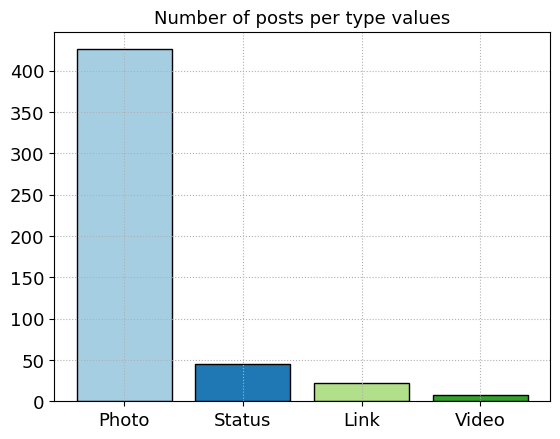

In [21]:
type_data = fb_df.Type.value_counts(sort=False, dropna=False)
plt.bar(x=type_data.index, height=type_data.values,
        color=plt.cm.Paired.colors, edgecolor='k')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Number of posts per type values', fontsize=13)
plt.grid(linestyle=':')
plt.savefig('plots/number_posts_per_type_values.png', dpi=288, bbox_inches='tight');

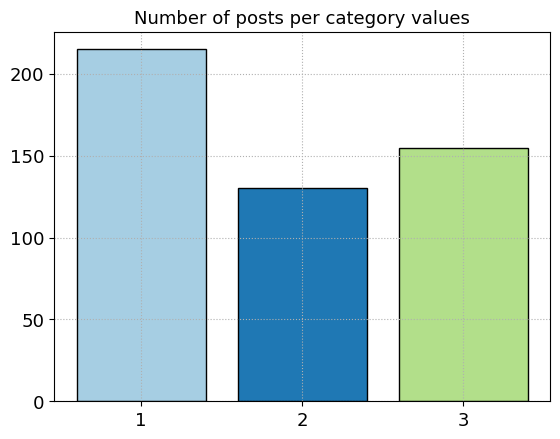

In [22]:
category_data = fb_df.Category.value_counts(sort=False, dropna=False).sort_index()
plt.bar(x=category_data.index, height=category_data.values,
        color=plt.cm.Paired.colors, edgecolor='k')
plt.xticks(category_data.index, fontsize=13)
plt.yticks(fontsize=13)
plt.title('Number of posts per category values', fontsize=13)
plt.grid(linestyle=':')
plt.savefig('plots/number_posts_per_category_values.png', dpi=288, bbox_inches='tight');

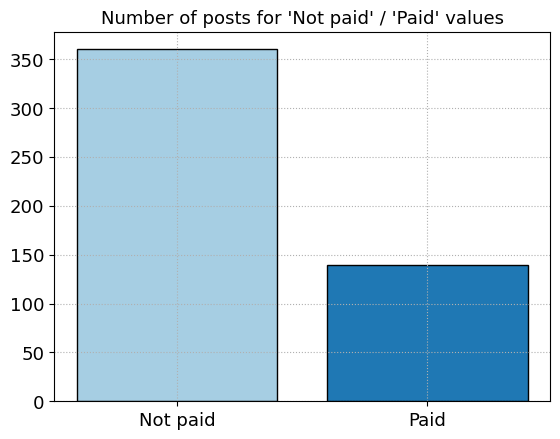

In [23]:
paid_data = fb_df.Paid.value_counts(sort=False, dropna=True).sort_index()
plt.bar(x=paid_data.index, height=paid_data.values,
        color=plt.cm.Paired.colors, edgecolor='k')
plt.xticks(ticks=paid_data.index, labels=['Not paid', 'Paid'], fontsize=13)
plt.yticks(fontsize=13)
plt.title('''Number of posts for 'Not paid' / 'Paid' values''', fontsize=13)
plt.grid(linestyle=':')
plt.savefig('plots/number_posts_for_paid_not_paid_values.png', dpi=288, bbox_inches='tight');

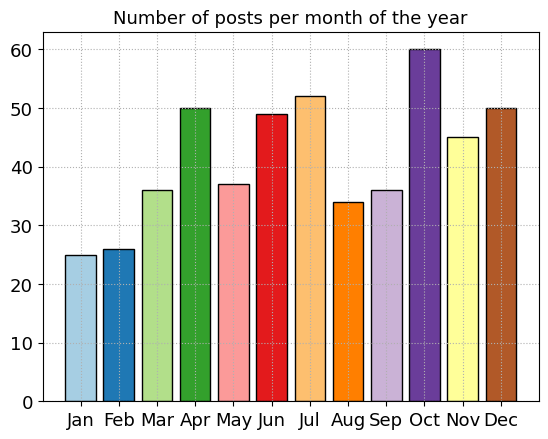

In [24]:
month_data = fb_df['Post Month'].value_counts(sort=False).sort_index()
plt.bar(x=month_data.index, height=month_data.values,
        color=plt.cm.Paired.colors, edgecolor='k')
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',\
        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=month_data.index, labels=months, fontsize=13)
plt.yticks(fontsize=13)
plt.title('Number of posts per month of the year', fontsize=13)
plt.grid(linestyle=':')
plt.savefig('plots/number_of_posts_per_month_of_year.png', dpi=288, bbox_inches='tight');

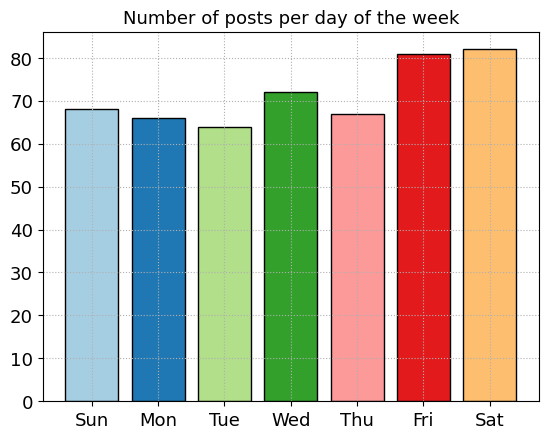

In [25]:
day_data=fb_df['Post Weekday'].value_counts(sort=False).sort_index()
plt.bar(x=day_data.index, height=day_data.values,
        color=plt.cm.Paired.colors, edgecolor='k')
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
plt.xticks(ticks=day_data.index, labels=days, fontsize=13)
plt.yticks(fontsize=13)
plt.title('Number of posts per day of the week', fontsize=13)
plt.grid(linestyle=':')
plt.savefig('plots/number_of_posts_per_day_of_week.png', dpi=288, bbox_inches='tight');

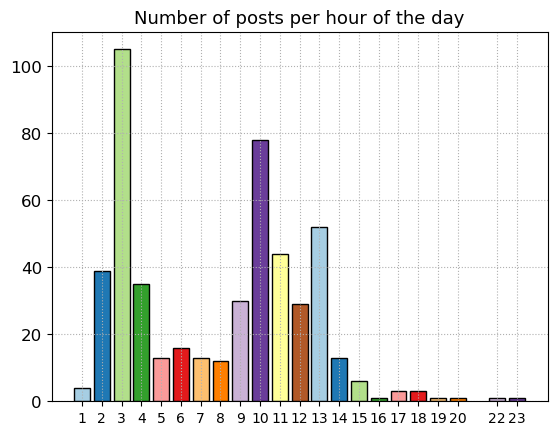

In [26]:
hour_data = fb_df['Post Hour'].value_counts(sort=False).sort_index()
plt.bar(x=hour_data.index, height=hour_data.values,
        color=plt.cm.Paired.colors, edgecolor='k')
plt.xticks(hour_data.index, fontsize=10)
plt.yticks(fontsize=12)
plt.title('Number of posts per hour of the day', fontsize=13)
plt.grid(linestyle=':')
plt.savefig('plots/number_of_posts_per_hour_of_day.png', dpi=288, bbox_inches='tight');

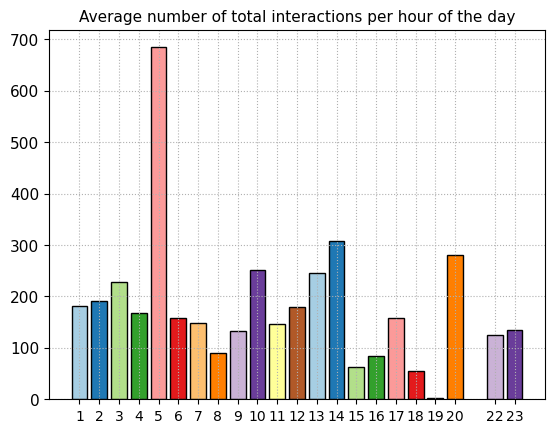

In [27]:
tot_int_df=fb_df['Total Int'].groupby(fb_df['Post Hour']).mean()
plt.bar(x=tot_int_df.index, height=tot_int_df.values,
        color=plt.cm.Paired.colors, edgecolor='k')
plt.xticks(ticks=tot_int_df.index, fontsize=10)
plt.yticks(fontsize=11)
plt.title('Average number of total interactions per hour of the day', fontsize=11)
plt.grid(linestyle=':')
plt.savefig('plots/average_number_of_total_interactions_per_hour_of_day.png', dpi=288, bbox_inches='tight');

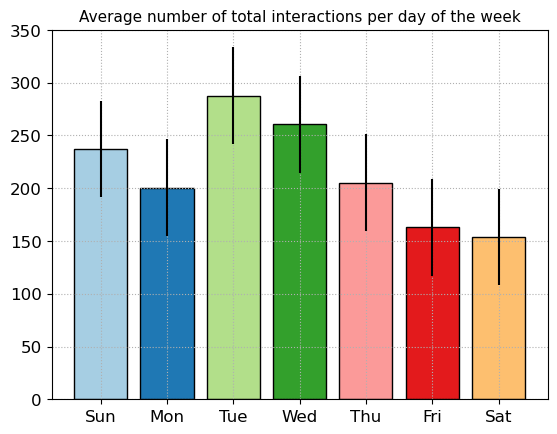

In [28]:
tot_int_df=fb_df['Total Int'].groupby(fb_df['Post Weekday']).mean()
plt.bar(x=tot_int_df.index, height=tot_int_df.values, yerr=np.std(tot_int_df.values),
        color=plt.cm.Paired.colors, edgecolor='k')
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
plt.xticks(ticks=tot_int_df.index, labels=days, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Average number of total interactions per day of the week', fontsize=11)
plt.grid(linestyle=':')
plt.savefig('plots/average_number_of_total_interactions_per_day_of_week.png', dpi=288, bbox_inches='tight');

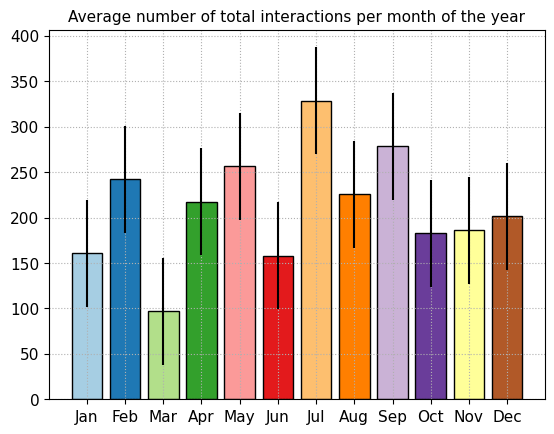

In [29]:
tot_int_df=fb_df['Total Int'].groupby(fb_df['Post Month']).mean()
plt.bar(x=tot_int_df.index, height=tot_int_df.values, yerr=np.std(tot_int_df.values),
        color=plt.cm.Paired.colors, edgecolor='k')
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',\
        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=tot_int_df.index, labels=months, fontsize=11)
plt.yticks(fontsize=11)
plt.title('Average number of total interactions per month of the year', fontsize=11)
plt.grid(linestyle=':')
plt.savefig('plots/average_number_of_total_interactions_per_month_of_year.png', dpi=288, bbox_inches='tight');

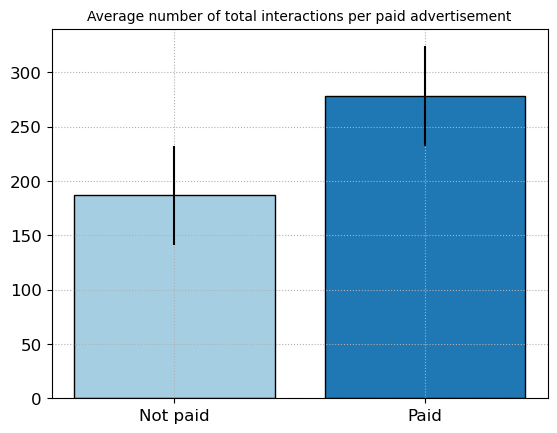

In [30]:
tot_int_df=fb_df['Total Int'].groupby(fb_df['Paid']).mean()
plt.bar(x=tot_int_df.index, height=tot_int_df.values, yerr=np.std(tot_int_df.values),
        color=plt.cm.Paired.colors, edgecolor='k')
days = ['Not paid', 'Paid']
plt.xticks(ticks=tot_int_df.index, labels=days, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Average number of total interactions per paid advertisement', fontsize=10)
plt.grid(linestyle=':')
plt.savefig('plots/average_number_of_total_interactions_per_paid_advertisement.png', dpi=288, bbox_inches='tight');

In [78]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
perf_cols = list(fb_df.columns[7:])
fb_perf_df = fb_df.loc[:, perf_cols]
fb_std = scalar.fit_transform(fb_perf_df)
fb_std_df = pd.DataFrame(fb_std, columns=perf_cols)

In [79]:
fb_std_df.head()

,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,-0.490859,-0.319251,-0.754391,-0.782390,-0.628507,-0.229166,-0.644420,-0.802117,-0.164558,-0.306263,-0.241157,-0.295167
1,-0.151569,-0.137227,0.545365,0.637720,0.129526,-0.084652,-0.061698,0.813599,-0.117298,-0.148405,0.040730,-0.126681
2,-0.505781,-0.328608,-0.755407,-0.777853,-0.631009,-0.233620,-0.662272,-0.780879,-0.353596,-0.346502,-0.311629,-0.347819
3,1.594532,0.761212,1.311601,-0.009950,-0.148169,0.740997,3.317884,1.267764,2.387461,4.314961,2.812614,4.119702
4,-0.293131,-0.208428,-0.253390,-0.440974,-0.417859,-0.176430,-0.441145,-0.349586,0.544336,0.455171,0.510541,0.476185


In [80]:
fb_std_df.describe().applymap('{:.2f}'.format)

,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,499.00,496.00,500.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.60,-0.38,-0.93,-0.90,-0.70,-0.27,-0.83,-0.98,-0.35,-0.55,-0.64,-0.56
25%,-0.47,-0.31,-0.54,-0.53,-0.45,-0.21,-0.57,-0.52,-0.31,-0.38,-0.41,-0.37
50%,-0.38,-0.27,-0.30,-0.28,-0.28,-0.18,-0.41,-0.32,-0.21,-0.24,-0.19,-0.23
75%,-0.03,-0.10,0.14,0.18,0.02,-0.03,0.18,0.08,-0.02,0.03,0.12,0.04
max,7.33,14.09,10.70,11.94,9.19,18.27,5.85,6.15,17.23,15.46,17.92,16.12


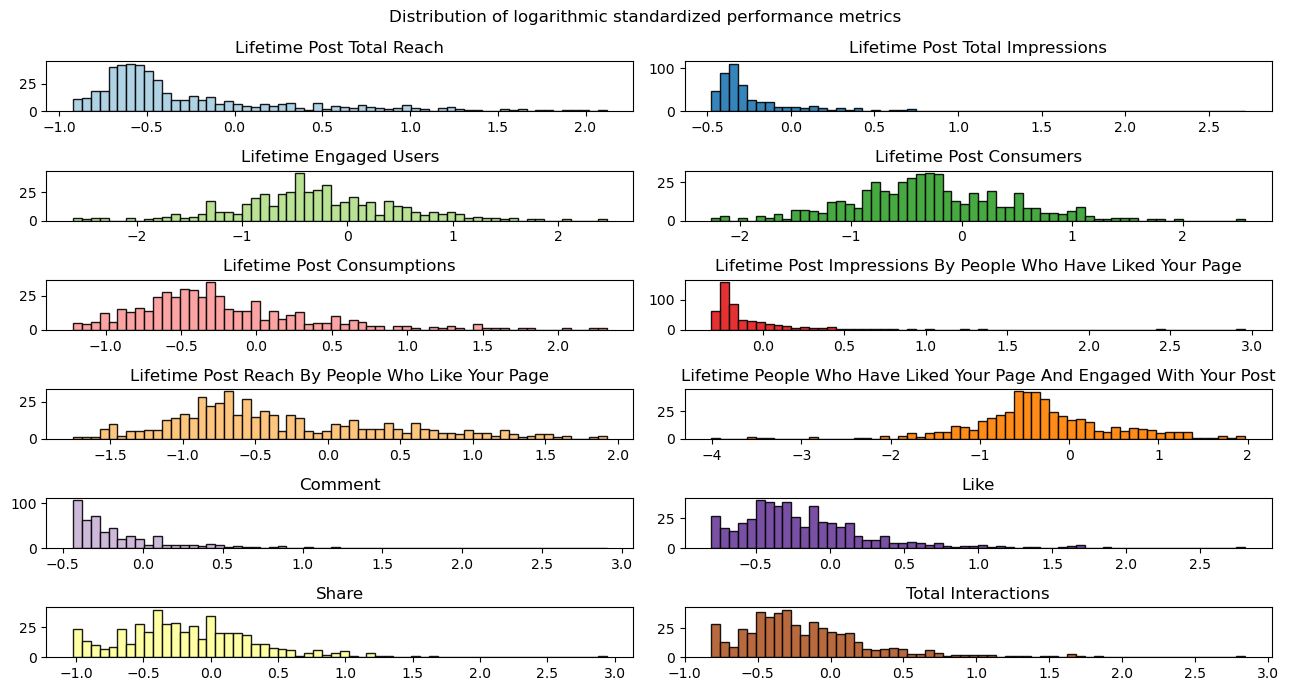

In [82]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(13, 7))
# using 'Paired' colormap
cmap = plt.cm.Paired.colors
for ax, clm, col in zip(axes.flat, perf_cols, cmap):
    ax.hist(np.log(fb_std_df.loc[:, clm]+1), edgecolor='k', alpha=0.9, color=col, bins=60,)
    ax.set_title(clm.title())
plt.suptitle('Distribution of logarithmic standardized performance metrics'.capitalize())
plt.tight_layout()
plt.savefig('plots/performance_metrics_log_hist.png', dpi=288, bbox_inches='tight')

In [31]:
timePivot = pd.pivot_table(fb_df, aggfunc='mean', columns='Post Hour',
                           index='Post Weekday', values='Like')
timePivot = timePivot[range(1, 21)]

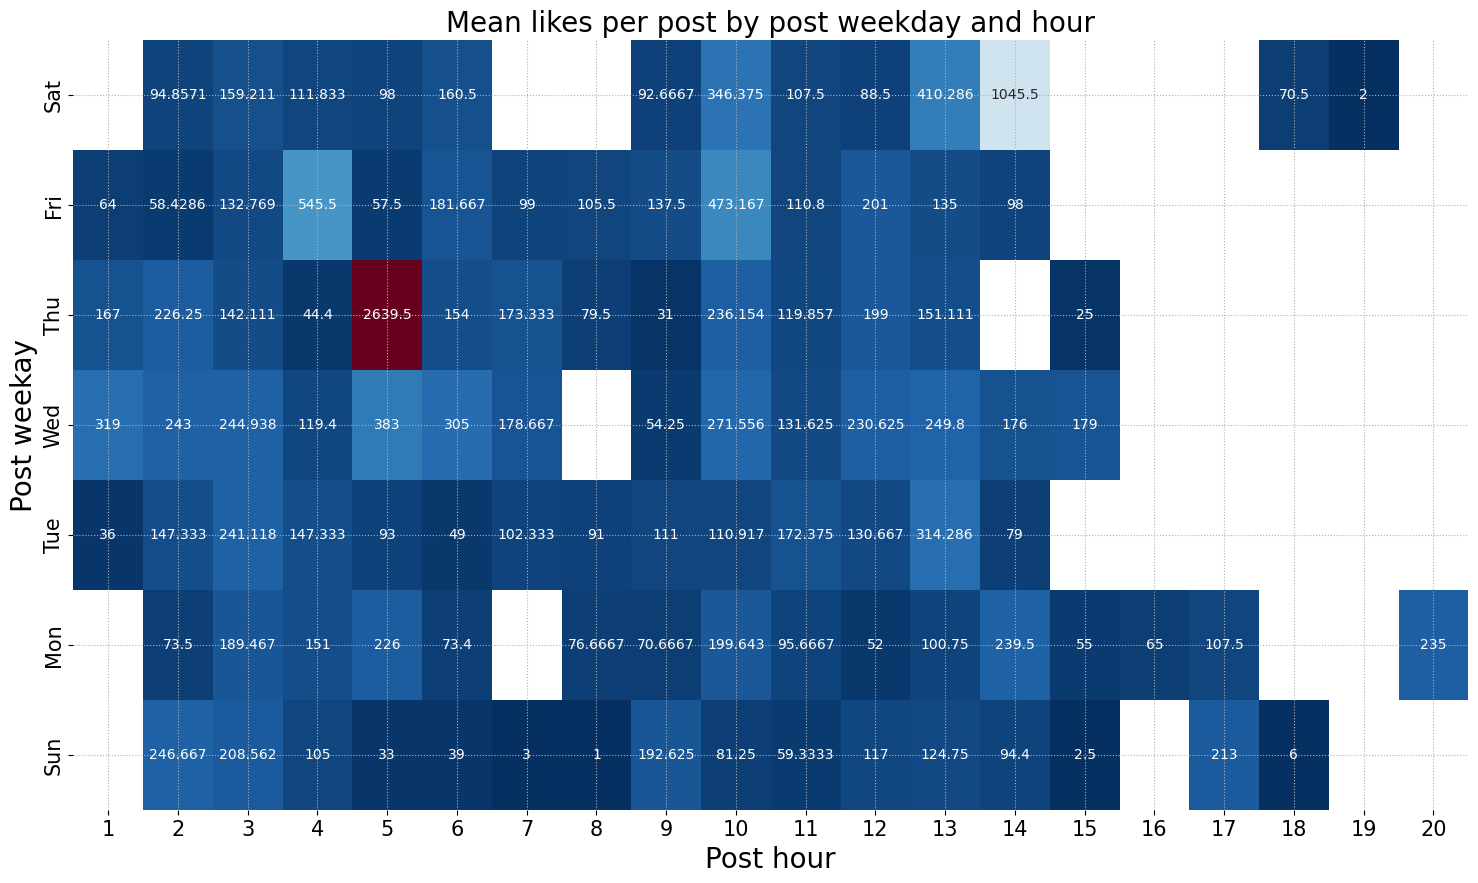

In [32]:
plt.figure(figsize=(18,10))
# cmap = sns.cubehelix_palette(8, start=0.75, rot=0.75, as_cmap=True)
sns.heatmap(timePivot, cbar=False, cmap='RdBu_r', annot=True, fmt='g')
plt.yticks(np.arange(0.5,7.5), ['Sat','Fri','Thu','Wed','Tue','Mon','Sun'],
           fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Post hour', fontsize=20)
plt.ylabel('Post weekay', fontsize=20)
plt.title('Mean likes per post by post weekday and hour', fontsize=20)
plt.grid(linestyle=':')
plt.savefig('plots/mean_like_heatmap.png', dpi=288, bbox_inches='tight');